In [26]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:


# Завантаження датасету з Kaggle
path = kagglehub.dataset_download("l3llff/banana")


df = pd.read_csv(f"{path}/banana_quality.csv")

print(df.sample(5).T, "\n")
print(f"List of column names:", df.columns, "\n")

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")


Using Colab cache for faster access to the 'banana' dataset.
                 3676      4089      1576      108       3189
Size        -0.871141 -0.476271 -2.734532 -0.853612 -3.683303
Weight      -0.887655 -3.092446  0.468992  2.137665 -2.429186
Sweetness   -1.656187   1.02061  0.360827  1.116726 -2.061217
Softness    -1.960314  3.009187 -5.347766 -0.760992  0.822163
HarvestTime  0.097022 -0.006019 -1.311914 -1.238461 -0.949592
Ripeness     1.406868  3.825176  4.479476  0.115005  2.484881
Acidity     -1.932884 -4.848025 -2.018752  1.138878 -4.551989
Quality           Bad      Good      Good      Good       Bad 

List of column names: Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object') 

There are 8000 rows and 8 columns in the dataset


In [28]:
df.info()
df.isnull().sum() / len(df) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


,0
Size,0.0
Weight,0.0
Sweetness,0.0
Softness,0.0
HarvestTime,0.0
Ripeness,0.0
Acidity,0.0
Quality,0.0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Ознаки і ціль
X = df.drop("Quality", axis=1)

le = LabelEncoder()
y = le.fit_transform(df["Quality"])

# 2) Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Нормалізація
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)



X_train: (6400, 7)
X_test: (1600, 7)


In [30]:
model = keras.Sequential()

model.add(layers.Input(shape=(X_train.shape[1],)))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    shuffle=True,
    verbose=1
    )


Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7817 - loss: 0.4998 - val_accuracy: 0.9523 - val_loss: 0.1682
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8965 - loss: 0.2573 - val_accuracy: 0.9664 - val_loss: 0.1277
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9054 - loss: 0.2499 - val_accuracy: 0.9656 - val_loss: 0.1200
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9318 - loss: 0.1965 - val_accuracy: 0.9688 - val_loss: 0.1080
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9202 - loss: 0.2159 - val_accuracy: 0.9727 - val_loss: 0.1058
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - loss: 0.2022 - val_accuracy: 0.9734 - val_loss: 0.1002
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9431 - loss: 0.1908 - val_accuracy: 0.9727 - val_loss: 0.0992
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9330 - loss: 0.1913 - val_accuracy: 0.

/tmp/ipython-input-2052404225.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'b')
/tmp/ipython-input-2052404225.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, "b", label="Validation loss", color = 'y')


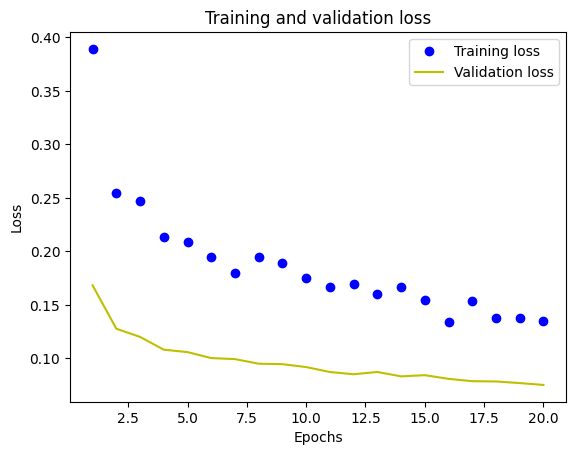

In [32]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss", color = 'b')
plt.plot(epochs, val_loss_values, "b", label="Validation loss", color = 'y')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Loss Score:', round(score[0], 4))
print('Accuracy Score:', round(score[1], 4))

Loss Score: 0.0577
Accuracy Score: 0.9831


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))



SVM Accuracy: 0.9812

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       781
           1       0.98      0.98      0.98       819

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


Confusion Matrix:

[[765  16]
 [ 14 805]]
